## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICE"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name=f"hidden_layer{i+1}")(input_layer)
            x = keras.layers.Dropout(rate=drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name=f"hidden_layer{i+1}")(x)
            x = keras.layers.Dropout(rate=drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = 256
MOMENTUM = 0.95

Dropout_EXP = [0.1, 0.25, 0.5]
LAYER_NEURONS = [[512, 256, 128], [256, 128, 64], [128, 64, 32]]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for i, (layer_neurons, drp_rate) in enumerate(itertools.product(LAYER_NEURONS, Dropout_EXP)):
    print(f"Numbers of exp: {i}, layer: {layer_neurons}, dropout_rate: {drp_rate:.2f}")
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=layer_neurons, drp_ratio=drp_rate)
    model.summary()
    opt = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train,
              y_train,
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}
    

W0719 01:43:32.285096 11312 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 01:43:32.298074 11312 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 01:43:32.301091 11312 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 01:43:32.317068 11312 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0719 01:43:32.325066 11312 deprecation.py:506] Fr

Numbers of exp: 0, layer: [512, 256, 128], dropout_rate: 0.10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dro

W0719 01:43:32.537266 11312 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 82us/step - loss: 1.9852 - acc: 0.2729 - val_loss: 1.7706 - val_acc: 0.3631
Epoch 2/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.7748 - acc: 0.3599 - val_loss: 1.6733 - val_acc: 0.3994
Epoch 3/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.6917 - acc: 0.3926 - val_loss: 1.6046 - val_acc: 0.4266
Epoch 4/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.6374 - acc: 0.4152 - val_loss: 1.5739 - val_acc: 0.4429
Epoch 5/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.5992 - acc: 0.4268 - val_loss: 1.5241 - val_acc: 0.4544
Epoch 6/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.5616 - acc: 0.4402 - val_loss: 1.4778 - val_acc: 0.4735
Epoch 7/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.5333 - acc: 0.4519 - val_loss: 1.4939 - val_acc

50000/50000 [==============================] - 3s 54us/step - loss: 1.6007 - acc: 0.4235 - val_loss: 1.5448 - val_acc: 0.4551
Epoch 20/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.5970 - acc: 0.4266 - val_loss: 1.5426 - val_acc: 0.4591
Epoch 21/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.5913 - acc: 0.4271 - val_loss: 1.5145 - val_acc: 0.4616
Epoch 22/30
50000/50000 [==============================] - 3s 53us/step - loss: 1.5892 - acc: 0.4309 - val_loss: 1.5256 - val_acc: 0.4623
Epoch 23/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.5870 - acc: 0.4309 - val_loss: 1.5135 - val_acc: 0.4681
Epoch 24/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.5741 - acc: 0.4371 - val_loss: 1.5273 - val_acc: 0.4650
Epoch 25/30
50000/50000 [==============================] - 3s 54us/step - loss: 1.5698 - acc: 0.4350 - val_loss: 1.5084 - val_acc: 0.4663
Epoch 26/30
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 63us/step - loss: 2.0094 - acc: 0.2641 - val_loss: 1.7985 - val_acc: 0.3610
Epoch 2/30
50000/50000 [==============================] - 3s 50us/step - loss: 1.8187 - acc: 0.3444 - val_loss: 1.6982 - val_acc: 0.3895
Epoch 3/30
50000/50000 [==============================] - 2s 49us/step - loss: 1.7518 - acc: 0.3731 - val_loss: 1.6621 - val_acc: 0.4132
Epoch 4/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.6940 - acc: 0.3937 - val_loss: 1.5912 - val_acc: 0.4317
Epoch 5/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.6547 - acc: 0.4073 - val_loss: 1.5485 - val_acc: 0.4438
Epoch 6/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.6241 - acc: 0.4191 - val_loss: 1.5525 - val_acc: 0.4495
Epoch 7/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.5980 - acc: 0.4275 - val_loss: 1.5436 - val_acc

50000/50000 [==============================] - 2s 48us/step - loss: 1.6545 - acc: 0.4027 - val_loss: 1.5838 - val_acc: 0.4368
Epoch 20/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.6518 - acc: 0.4040 - val_loss: 1.5686 - val_acc: 0.4486
Epoch 21/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.6430 - acc: 0.4084 - val_loss: 1.5677 - val_acc: 0.4416
Epoch 22/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.6450 - acc: 0.4080 - val_loss: 1.5455 - val_acc: 0.4511
Epoch 23/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.6314 - acc: 0.4116 - val_loss: 1.5392 - val_acc: 0.4556
Epoch 24/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.6320 - acc: 0.4144 - val_loss: 1.5375 - val_acc: 0.4575
Epoch 25/30
50000/50000 [==============================] - 2s 48us/step - loss: 1.6198 - acc: 0.4172 - val_loss: 1.5371 - val_acc: 0.4569
Epoch 26/30
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 62us/step - loss: 2.1115 - acc: 0.2105 - val_loss: 1.9126 - val_acc: 0.3150
Epoch 2/30
50000/50000 [==============================] - 2s 47us/step - loss: 1.9133 - acc: 0.3070 - val_loss: 1.7802 - val_acc: 0.3624
Epoch 3/30
50000/50000 [==============================] - 2s 47us/step - loss: 1.8372 - acc: 0.3336 - val_loss: 1.7473 - val_acc: 0.3715
Epoch 4/30
50000/50000 [==============================] - 2s 46us/step - loss: 1.7946 - acc: 0.3501 - val_loss: 1.6872 - val_acc: 0.3928
Epoch 5/30
50000/50000 [==============================] - 2s 47us/step - loss: 1.7537 - acc: 0.3654 - val_loss: 1.6739 - val_acc: 0.3997
Epoch 6/30
50000/50000 [==============================] - 2s 47us/step - loss: 1.7200 - acc: 0.3808 - val_loss: 1.6463 - val_acc: 0.4022
Epoch 7/30
50000/50000 [==============================] - 2s 47us/step - loss: 1.7009 - acc: 0.3876 - val_loss: 1.6392 - val_acc

50000/50000 [==============================] - 2s 47us/step - loss: 1.8771 - acc: 0.3020 - val_loss: 1.7913 - val_acc: 0.3602
Epoch 20/30
50000/50000 [==============================] - 2s 46us/step - loss: 1.8723 - acc: 0.3094 - val_loss: 1.7867 - val_acc: 0.3530
Epoch 21/30
50000/50000 [==============================] - 2s 47us/step - loss: 1.8743 - acc: 0.3061 - val_loss: 1.7995 - val_acc: 0.3585
Epoch 22/30
50000/50000 [==============================] - 2s 47us/step - loss: 1.8675 - acc: 0.3077 - val_loss: 1.7927 - val_acc: 0.3504
Epoch 23/30
50000/50000 [==============================] - 2s 47us/step - loss: 1.8669 - acc: 0.3102 - val_loss: 1.8016 - val_acc: 0.3472
Epoch 24/30
50000/50000 [==============================] - 2s 46us/step - loss: 1.8664 - acc: 0.3112 - val_loss: 1.8129 - val_acc: 0.3431
Epoch 25/30
50000/50000 [==============================] - 2s 46us/step - loss: 1.8602 - acc: 0.3116 - val_loss: 1.7732 - val_acc: 0.3664
Epoch 26/30
50000/50000 [=====================

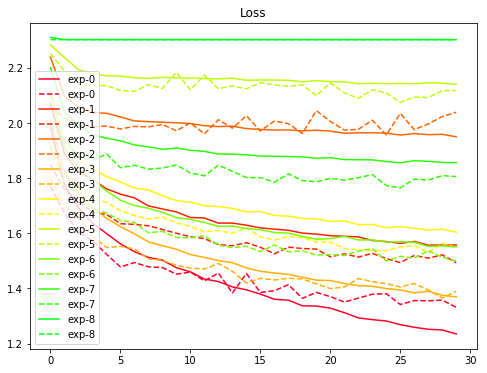

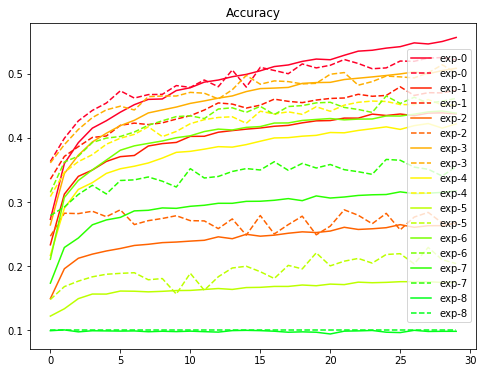

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
"""Code Here
將結果繪出
"""

NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()